<a href='https://fihm.ai/' target='_blank'><img src='https://i.postimg.cc/Y25KhxPM/q.png' border='0' width = 250 alt='q'/></a>

## ` سلسلة فهم لتعلم الآلة - الجزء الخامس - تقليل أبعاد البيانات `
## `Fihm Series for Machine Learning - Part 5 - Dimensionality Reduction`

___
### `مقدمة`
`أهلا بكم في الجزء الخامس من سلسلة فهم لتعلم الآلة. في هذا الجزء سوف نستكشف سويًا ماهو التعلم الآلي الغير خاضع للإشراف وإحدى أهم استخداماته ألا وهي تقليل أبعاد البيانات. إن التعلم الغير الخاضع للإشراف هو نوع من أنواع التعلم الآلي تتعلم فيه الخوارزمية أنماط البيانات الغير مسماة، أي أنها تستكشف الأنماط في جداول البيانات التي لا تحتوي على متغيرات مستهدفة. وإن تطبيقات التعلم الآلي الغير خاضع للإشراف متعددة، فهي تشمل تقسيم العملاء، اكتشاف الشذوذ والقيم المتطرفة،التعرف على الصور، معالجة اللغات وأنظمة الاقتراحات. وفي درس اليوم سوف نتناول أحد أشهر تطبيقات التعلم الآلي الغير خاضع للأشراف، ألا وهو تقليل أبعاد البيانات
`

___
### `تقليل أبعاد البيانات من خلال تحليل المكونات الرئيسية` 
### `Dimensionality Reduction via Principal Component Analysis (PCA)`

`
تحليل المكونات الرئيسية هو أحد الأساليب الشائعة في التعلم الغير الخاضع للإشراف والذي يستخدم لتقليل الأبعاد. وهو عبارة عن طريقة إحصائية تحدد البنية الأساسية للبيانات ذات الأبعاد الكثيرة - أي التي تحتوي على العديد من الأعمدة - من أجل تقليل حجمها. ولذلك فهي تستخدم في فهم البيانات عالية التعقيد ومن أجل تقليل الوقت المستغرق في تدريب النموذج لأن حجم البيانات يصبح أصغر بعد عملية تحليل المكونات الرئيسية`

___
### `ماذا نريد أن نفعل؟`
`قمنا سابقا في درس`

https://fihm.ai/tutorials/human-activity-recognition-by-machine-learning/

`ببناء نماذج تعلم آلة تقوم بتصنيف نوع النشاط البدني الذي يقوم به الإنسان، ولكن إن تمعنا جيدًا في عدد الأعمدة المستخدمة في تدريب النماذج نجد أننا قمنا باستخدام 563 عامود (ميزة) وهو عددٌ كبير جدًا. وهو ما نلاحظه من حجم البيانات ألا وهو 18.4 ميقابايت. مهمتنا اليوم هو تقليل حجم البيانات من خلال تقليص عدد الأعمدة ومن ثم تدريب نماذج تعلم الآلة من جديد مع المحافظة قدر المستطاع على الأداء`

_____

### `البيانات المستخدمة في هذا الدرس`

`في هذا الدرس سوف نستكمل استخدامنا لبيانات حركة جسم الإنسان والتي يمكن تحميلها من الرابط التالي`

https://github.com/AI-MOO/Fihm_Lessons/blob/master/Human_Activity_Recognition_ML/data/test.csv

`المصدر الأصلي للبيانات`

https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

In [1]:
import pandas as pd
data = pd.read_csv('https://github.com/AI-MOO/Fihm_Lessons/raw/master/Human_Activity_Recognition_ML/data/test.csv')
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


`عند التحقق من عدد الأعمدة نجد أن لدينا 563 عامودًا مستخدما`

In [2]:
print('data dimensions are:', data.shape)

data dimensions are: (2947, 563)


_____

### `ماهي المشكلة بالأبعاد الكثيرة؟`

`
إن وجود مجموعة بيانات تحتوي على 563 عمودًا قدد يسبب مشاكل في ما يلي 
`

`
وقت الحساب 1 - Computation time
`

`
مع وجود عدد كبير من الأعمدة، تستغرق معالجة البيانات وتدريب نماذج التعلم الآلي وقتًا أطول
`

`
تشبع النموذج 2 - overfitting`

`
عندما يكون لدينا الكثير من الميزات، سيكون هناك في الغالب الكثير من الضوضاء (معلومات ذات أهمية قليلة أو معدومة) في البيانات بدلاً من الأنماط الأساسية. وهذا سوف يؤدي إلى زيادة تشبع النموذج، مما يعني أن النموذج سوف يعمل بشكل جيد على بيانات التدريب ولكن بشكل سيئ على البيانات الجديدة كما أشرنا في الجزء الرابع من السلسلة
`

`
لعنة الأبعاد 3 - Curse of dimensionality
`

`
إن مع زيادة عدد الميزات، تزداد أيضًا كمية البيانات المطلوبة (عدد الصفوف) لتحقيق مستوى مقبول في أداء النموذج. يُعرف هذا بإسم لعنة الأبعاد ، ويمكن أن يكون تحديًا خاصًا حين تكون البيانات محدودة
`


`
الحل: لمعالجة هذه المشكلات، يمكن استخدام تقنية تحليل المكونات الأساسية
`

`
PCA
`

`
 لتقليل عدد الأعمدة في مجموعة البيانات، والتي سوف تساعدنا في التقاط أكبر كمية من المعلومات المفيدة وإزالة المعلومات الزائدة عن الحاجة أو ليست ذات الصلة. مما يؤدي إلى وقت تدريب أسرع، وتقليل مخاطر التشبع العالي
`

`Reducing data dimensions reduces training time and the risk of overfitting`


### `Step One: Measure Time and Accuracy on The Complete Dimensions  — الخطوة الأولى: قياس وقت التدريب و دقة النموذج على الأبعاد الكاملة `


`نقوم بفصل البيانات أولا كالتالي`

In [3]:
X = data.drop('Activity', axis = 1) #Independent variables
y = data.Activity #Dependent variable

In [4]:
from sklearn.model_selection import train_test_split
rs = 221
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs, stratify = y)

`ومن ثم توحيد المقايس بين الأعمدة`

In [5]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_s = scalar.fit_transform(X_train)
X_test_s = scalar.transform(X_test)

`الأن سوف نستخدم خوازمية الانحدار الخطي لتدريب النموذج ورؤية الوقت المستغرق في التدريب والدقة الناتجة، للتنويه: عند استخدام نفس الحالة العشوائية (3221) سوف نحصل على نتائج دقة متساوية، ووقت التدريب سوف يختلف باختلاف المعالج المستخدم ولكنه سوف يكون اختلاف طفيف جدًا`

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
%%time
model = LogisticRegression(solver='liblinear', random_state = rs)
model = model.fit(X_train_s, y_train)
y_pred = model.predict(X_test_s)

CPU times: user 2.01 s, sys: 15.6 ms, total: 2.03 s
Wall time: 2.03 s


`نلاحظ أن`

`CPU times = 2.01 s`
    
`وهو الوقت الذي استغرقه المعالج لتدريب النموذج وإجراء التوقع. الأن فلنقم بالتحقق من الدقة`

In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy score:  0.98


### `Step Two: Reduce Data Dimensions  — الخطوة الثانية: تقليل أبعاد البيانات  `

`سوف نقوم الآن بتجربة اختزال جميع المزايا المستخدمة ألا وهي 563 إلى ميزتين فقط. ومن ثم تجربة تدريب نموذج على هذه الميزتين فقط ورؤية أثرها في تقليل وقت التدريب وعلى الدقة`

In [9]:
# Reduce dimensions
from sklearn.decomposition import PCA  
model = PCA(n_components=2)  # Use 2 components only          
X_train_s_PCA = model.fit_transform(X_train_s)                     
X_test_s_PCA = model.transform(X_test_s)     

`لاحظ أننا قمنا باستخدام الأعمدة المستقلة فقط في تدريب النموذج
`

`X_train_s`


`لأننا لا نقوم باستخدام العامود المستهدف`

`y_train`

`في تدريب نماذج التعلم الآلي الغير خاضع للإشراف. ويمكننا التحقق من البعدين الناتجين كالتالي`


In [10]:
X_test_s_PCA[1:11]

array([[-15.21833787,   1.1179913 ],
       [ 36.00811118,   5.52825821],
       [ -1.72974663,  -9.75052315],
       [-13.87582545,  -0.24468543],
       [-16.05932873,  -3.17572823],
       [-16.67426293,   6.54099994],
       [-16.8641901 ,   1.06662178],
       [-16.90179699,   2.07001619],
       [-14.55951538,  -5.19195412],
       [-11.79378466,  -6.60872167]])

`الآن فلنقم بتدريب نموذج التصنيف باستخدام`

`PCA1 & PCA2`

`
فقط ورؤية الوقت المستغرق في التدريب`

In [11]:
%%time
model = LogisticRegression(solver='liblinear', random_state = rs)
model = model.fit(X_train_s_PCA, y_train)
y_pred = model.predict(X_test_s_PCA)

CPU times: user 13.2 ms, sys: 1.02 ms, total: 14.2 ms
Wall time: 18.4 ms


`نلاحظ أن عملية التدريب قد أصبحت أقصر بكثير، حيث أن الوقت المستغرق لتدريب النموذج وإجراء التوقع أصبح فقط`

`13.2 ms`

`نستطيع حفظ البيانات المختزلة مع العامود المستهدف في جدول ورسمه كالتالي`

In [12]:
Reduced_df = pd.DataFrame(y_test)
Reduced_df['PCA1'] = X_test_s_PCA[:,0]
Reduced_df['PCA2'] = X_test_s_PCA[:,1]
Reduced_df.reset_index().drop('index',axis = 1)
Reduced_df.sample(10)

,Activity,PCA1,PCA2
1658,WALKING_DOWNSTAIRS,29.411444,5.817405
1888,SITTING,-12.834180,-5.050696
1324,WALKING_DOWNSTAIRS,27.308516,10.027629
1338,WALKING_UPSTAIRS,12.092042,-9.790183
129,WALKING_DOWNSTAIRS,28.314707,3.364154
2002,WALKING_DOWNSTAIRS,8.573754,-5.650178
1574,LAYING,-16.767812,2.527772
1707,STANDING,-12.436791,-6.884028
2390,WALKING_UPSTAIRS,20.820705,-3.753692
509,SITTING,-13.267114,-8.254636


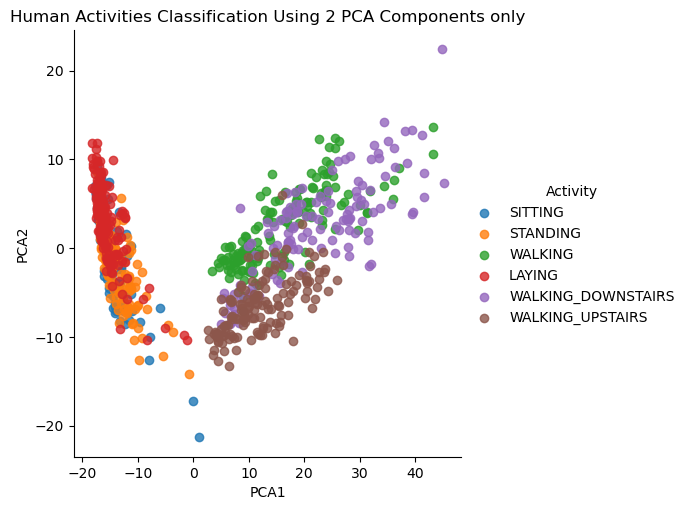

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot( x = 'PCA1', y = 'PCA2', hue='Activity', data=Reduced_df, fit_reg=False)
plt.title('Human Activities Classification Using 2 PCA Components only')
plt.show()

`تشير هذه الرسمة الثنائية الأبعاد أننا قمنا بتوقع نوع النشاط البدني الذي يقوم به الإنسان بناء على بعدين فقط ألا وهم
`

`PCA1 & PCA2`



`والآن فلنقم باختبار الدقة كالتالي`

In [14]:
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy score:  0.6


`نلاحظ أن الدقة متدنية نوعًا ما وغير مرضية. فعلى الرغم من أننا قمنا بتقليل وقت التدريب بشكل ممتاز، إلا أن أداء النموذج سيء. ولتحسين الدقة، فلنقم بتجربة اختزال المعلومات في 20 مكون بدلًا من اثنان فقط ورؤية وقت التدريب مع الدقة الجديدين`

In [15]:
model = PCA(n_components=20)  #Reduce data into 20 components          
X_train_s_PCA = model.fit_transform(X_train_s)                 
X_test_s_PCA = model.transform(X_test_s)       

In [16]:
%%time
model = LogisticRegression(solver='liblinear', random_state = rs)
model = model.fit(X_train_s_PCA, y_train)
y_pred = model.predict(X_test_s_PCA)

CPU times: user 99 ms, sys: 3.63 ms, total: 103 ms
Wall time: 103 ms


In [17]:
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy score:  0.89


`حسنًا!، لقد قمنا باختزال 563 عامود إلى 20 عامود فقط. وقمنا بالمحافظة نسبيًا على دقة عالية 89% مع تقليل الوقت المستغرق في تدريب واختبار النموذج إلى `

`99 ms`

`الآن سوف نقوم برفع عدد المكونات الرئيسية إلى 200 حتى نستطيع الحصول على مثل الدقة الكاملة وهي 98 بالمئة `

In [27]:
model = PCA(n_components=200)            
X_train_s_PCA = model.fit_transform(X_train_s)                     
X_test_s_PCA = model.transform(X_test_s)    

In [28]:
%%time
model = LogisticRegression(solver='liblinear', random_state = rs)
model = model.fit(X_train_s_PCA, y_train)
y_pred = model.predict(X_test_s_PCA)

CPU times: user 936 ms, sys: 9.91 ms, total: 946 ms
Wall time: 835 ms


In [29]:
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy score:  0.98


` ممتاز! لقد قمنا بنجاح باختزال الأعمدة من 563 إلى 200 عامود فقط و تقليل الوقت الحسابي إلى`

`936ms`


`فقط مع المحافظة على نفس الدقة`

### `Step Three: Measure the Captured Variance per Component — الخطوة الثالثة: قياس كمية التباين الملتقط  `

`
الآن نحن نتساءلُ سويًا: كيف نختار عدد المكونات المناسب؟ إن عدد المكونات المناسب هو العدد الذي يضمن لنا التقاط كمية التباين الكافية للحصول على الدقة المطلوبة. حيث أن هدف المكونات الرئيسية هو أن تشرح التباين في البيانات، ومفهوم التباين الملتقط يشير إلى النسبة المئوية للتباين الكلي في البيانات التي يتم شرحها من خلال المكونات الناتجة. ولذلك يعد التباين الملتقط مؤشرًا مهمًا لأنه يخبرنا عن مقدار المعلومات الأصلية في البيانات التي تم الاحتفاظ بها بعد إجراء تحليل المكونات الأساسي. ولذلك سوف نقوم برؤية مجموع التباين الملتقط بناء على عدد المكونات الأساسية المستخدمة بدءًا بمكون واحد وصولا إلى 225 مكون
`

In [30]:
import numpy as np
pca_list = list()
feature_weight_list = list()


# Fit a range of PCA models

for n in range(1,226):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(X) # Remeber that X is the data without the label feature 'Activity'
    
    # Store the model and variance [First principle component always has higher weight]
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()})) # pending series to list
    
    # Calculate and store feature importances
    weights = PCAmod.explained_variance_ratio_.reshape(-1,1)/PCAmod.explained_variance_ratio_.sum()
    overall_contribution = np.abs(PCAmod.components_)*weights
    abs_feature_values = overall_contribution.sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': X.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
display(pca_df.head(10))
display(pca_df.tail(10))


/Users/salahkaf/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,model,var
n,,
1,PCA(n_components=1),0.49352
2,PCA(n_components=2),0.805745
3,PCA(n_components=3),0.830786
4,PCA(n_components=4),0.848237
5,PCA(n_components=5),0.857658
6,PCA(n_components=6),0.865275
7,PCA(n_components=7),0.872224
8,PCA(n_components=8),0.878073
9,PCA(n_components=9),0.883546


,model,var
n,,
216,PCA(n_components=216),0.998469
217,PCA(n_components=217),0.998497
218,PCA(n_components=218),0.998524
219,PCA(n_components=219),0.998549
220,PCA(n_components=220),0.998575
221,PCA(n_components=221),0.998601
222,PCA(n_components=222),0.998624
223,PCA(n_components=223),0.998652
224,PCA(n_components=224),0.998674


`نلاحظ أن عند استخدام عامودين فقط يتم التقاط 80.05% من التباين، ووصولا إلى 99.87% عند استخدام 225 عامود (أي 225 مكون). يمكننا أيضا رسم التباين الملتقط بناء على عدد المكونات كالتالي`

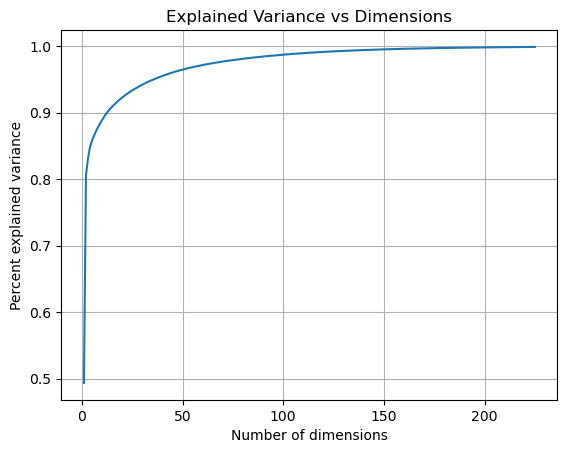

In [31]:
ax = pca_df['var'].plot(kind='line')
ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');
ax.grid(True)
plt.show()

`نلاحظ من الرسمة أن نسبة التباين الملتقط ترتفع من 80% إلى 95% خلال فترة زيادة أبعاد المكونات الرئيسية من 2 وصولا إلى 50. وبعد ذلك تكون الزيادة طفيفة في مقدار التباين الملتقط. مما يعني أننا نستطيع الحصول على دقة ممتازةإذا تم استخدام 50 مكون أو أكثر `

### `Bonus Step: Finding Features Impact on Variance Capturing — خطوة إضافية : إيجاد أثر الميزات في التقاط التباين  `

`استنتجنا سويًا أن تحليل المكونات الرئيسية هي تقنية لتقليل أبعاد جدول البيانات مع الاحتفاظ بأكبر قدر ممكن من المعلومات. تتمثل إحدى الفوائد الرئيسية لهذه التقنية في قدرتها على تحديد الميزات (الأعمدة) في جدول البيانات التي لها أكبر مشاركة في كمية التباين الذي تلتقطه المكونات الرئيسية. أي أننا نستطيع أن نستكشف أهمية الميزات بناء على نسبة التباين الذي يقدمه كل عامود. ففي الرسمة السابقة، قمنا برسم كمية التباين الملتقط بناء على عدد المكونات المستخدمة، الأن سوف نقوم بإنشاء جدول يحتوي على كمية المساهمة لكل عامود من الأعمدة المستقلة في نسبة التباين الملتقط كالتالي`

In [23]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

display(features_df.head())
display(features_df.tail())


features,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)","fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-1,16.1","fBodyAcc-bandsEnergy()-1,16.2",...,tGravityAccMag-arCoeff()4,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std()
n,,,,,,,,,,,,,,,,,,,,,
1,0.000977,0.001256,0.000118,7.853842e-07,0.000083,0.000017,0.001091,0.001383,0.000892,0.000841,...,0.000020,0.001561,0.004109,0.001981,0.002407,0.002829,0.002836,0.000999,0.002836,0.002742
2,0.001884,0.001443,0.000854,2.951726e-06,0.000079,0.000114,0.000424,0.001720,0.002247,0.001157,...,0.000805,0.002093,0.005572,0.002464,0.003083,0.003865,0.003907,0.001417,0.003907,0.003566
3,0.002493,0.001747,0.001025,1.737450e-05,0.000107,0.000113,0.000456,0.001700,0.002206,0.001116,...,0.000914,0.002058,0.005542,0.002366,0.002966,0.003729,0.003744,0.001355,0.003744,0.003433
4,0.002857,0.001840,0.001131,3.054009e-05,0.000115,0.000137,0.000452,0.001661,0.002150,0.001113,...,0.000975,0.002007,0.005557,0.002308,0.002891,0.003617,0.003646,0.001326,0.003646,0.003344
5,0.002827,0.001838,0.001152,3.987153e-05,0.000117,0.000139,0.000451,0.001660,0.002229,0.001099,...,0.000962,0.002014,0.005508,0.002291,0.002862,0.003567,0.003596,0.001306,0.003596,0.003307


`ولتفسير معنى القيم نلاحظ أن فهرس العامود `

`n`

`يمثل عدد المكونات المستخدمة في كل مرة، فالصف الأول يمثل أن البيانات تم اختزالها في عامود واحد فقط (أي مكون أساسي وحيد). وكل قيمة عامود بالصف تمثل كمية التباين الملتقط من ذلك العامود، ومجموع القيم لكل صف يساوي مجموع نسبة التباين الملتقط. إن هذه التحاليل تساعدنا في معرفة أهمية الميزات وأثرها في عملية اجراء التوقعات، وهذه ميزة أخرى في تحليل المكونات الرئيسية إضافةً إلى قدرتها على تقليل حجم البيانات`

___
##  `ماذا تعلمنا؟`
#####     `في التعلم الغير خاضع للإشراف تبحث الخوارزمية عن البنية الخفية أو العلاقات بين البيانات • `
#####     `في التعلم الغير خاضع للإشراف لا يتم استخدام العامود المستهدف • `
#####     `قد يستخدم التعلم الغير خاضع للإشراف في تعزيز التعلم الخاضع للإشراف مثل تقليل الوقت المستغرق لتدريب نماذج التصنيف • `
#####   ` يمكن أن تكون الأبعاد الكبيرة مشكلة في تحليل البيانات والتعلم الآلي  • ` 
##### `Principle Component Analysis - PCA:`
#####     `   هي تقنية شائعة لحل مشكلة الأبعاد الكبيرة عن طريق تقليل عدد الميزات في مجموعة البيانات مع الاحتفاظ بمعظم المعلومات المهمة •`
#####     `  هذه التقنية تحدد الاتجاهات (أو المكونات الرئيسية) التي تلتقط أكبر قدر من التباين في البيانات  •`
#####     `  تستخدم التقنية  لتقليل الوقت المستغرق لتدريب النماذج وفهم أهمية المزايا •`
